In [53]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [54]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [55]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [56]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


Text(0.5, 1.0, 'Box plot of Median value of owner-occupied homes')

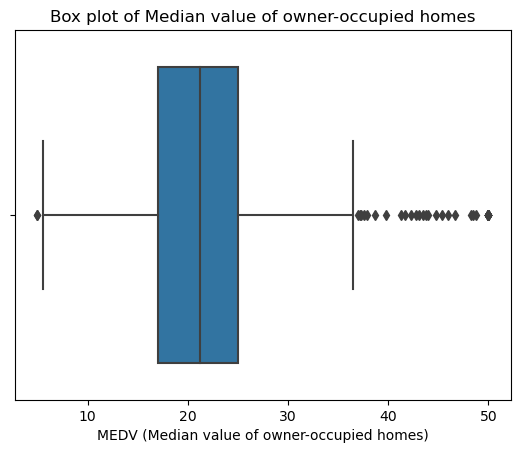

In [57]:
# Median value of owner-occupied homes
sns.boxplot(data=boston_df, x='MEDV')
plt.xlabel('MEDV (Median value of owner-occupied homes)')
plt.title('Box plot of Median value of owner-occupied homes')

Text(0.5, 1.0, 'Count of Tract bounds river')

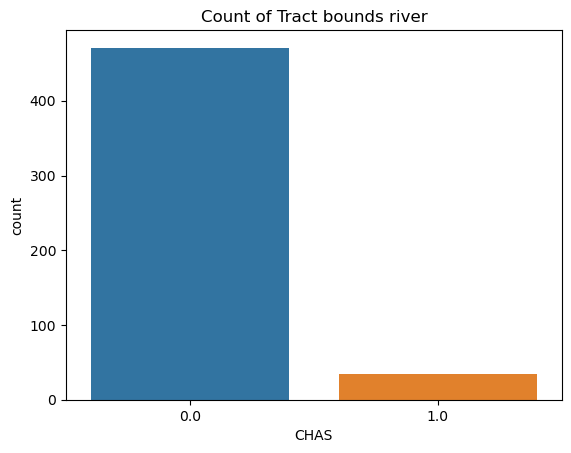

In [58]:
# Charles river variable (CHAS)
ax = sns.countplot(boston_df, x='CHAS')
ax.set_title('Count of Tract bounds river')

In [59]:
boston_df['age_group'] = boston_df['AGE'].apply(lambda x: '35 years and younger' if x<35 else '70 years and older' if x>=70 else 'between 35 and 70 years')

Text(0.5, 1.0, 'MEDV across age groups')

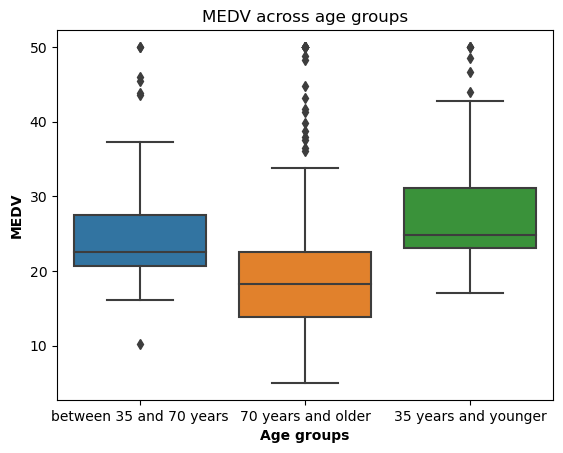

In [60]:
# boxplot for the MEDV variable vs the AGE variable
sns.boxplot(boston_df, x='age_group', y='MEDV')
plt.xlabel('Age groups', fontweight='bold')
plt.ylabel('MEDV', fontweight='bold')
plt.title('MEDV across age groups')

Text(0, 0.5, 'Proportion of non-retail business acres per town')

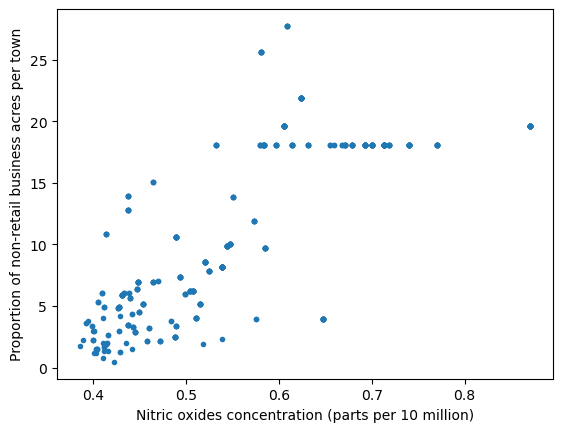

In [61]:
#  scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
plt.plot(boston_df['NOX'], boston_df['INDUS'], '.')
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')

# There is a positive relationship between the two.

Text(0, 0.5, 'Frequency')

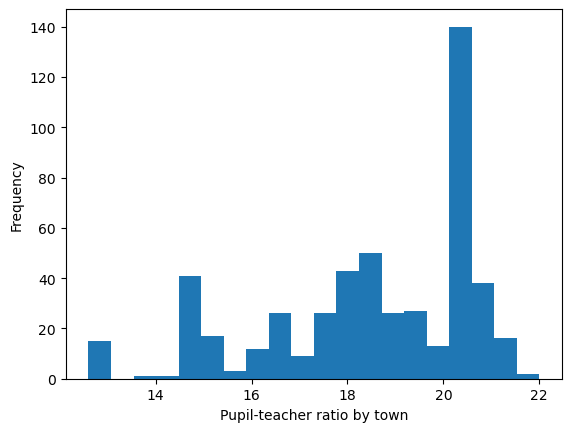

In [62]:
# histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'], bins=20)
plt.xlabel('Pupil-teacher ratio by town')
plt.ylabel('Frequency')


In [63]:
## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Ho = There is no difference in median value of houses bounded by Charles river
# Ha = There is difference in median value of houses bounded by Charles river

# Levene's Test
levene_result = scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'])
print(f"Levene result = {levene_result}")
# T-test
ttest_result = scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)
print(f"T-Test result = {ttest_result}")

print("Since p-value is less than 0.05, we reject the null hypothesis.")

Levene result = LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)
T-Test result = Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)
Since p-value is less than 0.05, we reject the null hypothesis.


In [64]:
## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Ho = There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
# Ha = There is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

# ANOVA

anova_result = scipy.stats.f_oneway(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],
                               boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                               boston_df[boston_df['age_group']=='70 years and older']['MEDV'])

print(f"ANOVA result = {anova_result}")
print("Since p-value is greater than 0.05, we accept the null hypothesis.")


ANOVA result = F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)
Since p-value is greater than 0.05, we accept the null hypothesis.


In [65]:
## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Ho = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# Ha = There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

pearson_result = scipy.stats.pearsonr(boston_df['NOX'],  boston_df['INDUS'])
print(f"Pearson correlation coefficient = {pearson_result}")
print(f"Since p-value is less than 0.05, we reject the null hypothesis.")

Pearson correlation coefficient = PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)
Since p-value is less than 0.05, we reject the null hypothesis.


In [66]:
## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

model = ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())
print("\n\nSince p-value is less than 0.05, the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes is statistically significant")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        15:53:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0